<a href="https://colab.research.google.com/github/tomraiz93/NLP-Toxic_Comment_Classification/blob/main/NLP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'red'> Toxic Comment Classifier Using </font> <font color = 'blue'>NLP</font>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.corpus import stopwords
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [4]:
pip install rarfile

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import rarfile
import pandas as pd
import tempfile
import os

# Tạo thư mục tạm thời để giải nén
temp_dir = tempfile.mkdtemp()

# Giải nén tệp train.rar
with rarfile.RarFile('/content/drive/MyDrive/NLP-data/train.rar', 'r') as train_rar:
    train_rar.extractall(temp_dir)

# Tìm tệp CSV trong thư mục tạm thời
train_csv_file = [file for file in os.listdir(temp_dir) if file.endswith('.csv')][0]

# Đọc tệp CSV và lưu vào DataFrame df_train
df_train = pd.read_csv(os.path.join(temp_dir, train_csv_file))

# Giải nén tệp test.rar
with rarfile.RarFile('/content/drive/MyDrive/NLP-data/test.rar', 'r') as test_rar:
    test_rar.extractall(temp_dir)

# Tìm tệp CSV trong thư mục tạm thời
test_csv_file = [file for file in os.listdir(temp_dir) if file.endswith('.csv')][0]

# Đọc tệp CSV và lưu vào DataFrame df_test
df_test = pd.read_csv(os.path.join(temp_dir, test_csv_file))

# Hiển thị DataFrame df_train và df_test
df_train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [7]:
import rarfile
import pandas as pd
import tempfile
import os

# Tạo thư mục tạm thời để giải nén
temp_dir = tempfile.mkdtemp()

try:
    # Giải nén tệp train.rar
    with rarfile.RarFile('/content/drive/MyDrive/NLP-data/train.rar', 'r') as train_rar:
        train_rar.extractall(temp_dir)

    # Tìm tệp CSV trong thư mục tạm thời
    train_csv_files = [file for file in os.listdir(temp_dir) if file.endswith('.csv')]
    if not train_csv_files:
        raise FileNotFoundError("No CSV file found in train.rar")
    train_csv_file = train_csv_files[0]

    # Đọc tệp CSV và lưu vào DataFrame df_train
    df_train = pd.read_csv(os.path.join(temp_dir, train_csv_file))
except Exception as e:
    print("Error occurred while processing train.rar:", e)

try:
    # Giải nén tệp test.rar
    with rarfile.RarFile('/content/drive/MyDrive/NLP-data/test.rar', 'r') as test_rar:
        test_rar.extractall(temp_dir)

    # Tìm tệp CSV trong thư mục tạm thời
    test_csv_files = [file for file in os.listdir(temp_dir) if file.endswith('.csv')]
    if not test_csv_files:
        raise FileNotFoundError("No CSV file found in test.rar")
    test_csv_file = test_csv_files[0]

    # Đọc tệp CSV và lưu vào DataFrame df_test
    df_test = pd.read_csv(os.path.join(temp_dir, test_csv_file))
except Exception as e:
    print("Error occurred while processing test.rar:", e)

# Hiển thị DataFrame df_train và df_test nếu không có lỗi xảy ra
if 'df_train' in locals():
    print("DataFrame df_train:")
    print(df_train)
else:
    print("No DataFrame df_train due to previous errors.")

if 'df_test' in locals():
    print("DataFrame df_test:")
    print(df_test)
else:
    print("No DataFrame df_test due to previous errors.")


DataFrame df_train:
                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  ob

In [8]:
df_train['comment_text'].fillna(' ')
df_test['comment_text'].fillna(' ')

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [9]:
df_train.shape

(159571, 8)

In [10]:
df_train.shape

(159571, 8)

In [11]:
df_test.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [12]:
df_test.shape

(159571, 8)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [14]:
df_train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [15]:
lis = []
for i in df_train.comment_text:
    lis.append(len(i))
lis.sort(reverse=True)
lis[-1]

6

In [16]:
df_train.describe(include = 'all')

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571,159571,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
unique,159571,159571,NaN,NaN,NaN,NaN,NaN,NaN
top,0000997932d777bf,Explanation\nWhy the edits made under my usern...,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,NaN,NaN,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df_train['comment_text'] = df_train['comment_text'].apply(remove_stopwords)
df_test['comment_text'] = df_test['comment_text'].apply(remove_stopwords)

<Axes: xlabel='toxic', ylabel='Count'>

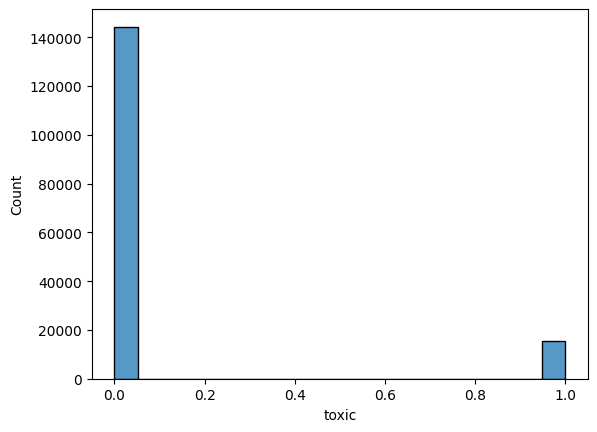

In [18]:
sns.histplot(data=df_train, x=df_train['toxic'])

### Visualization to See if we have Balance class or Imbalance class

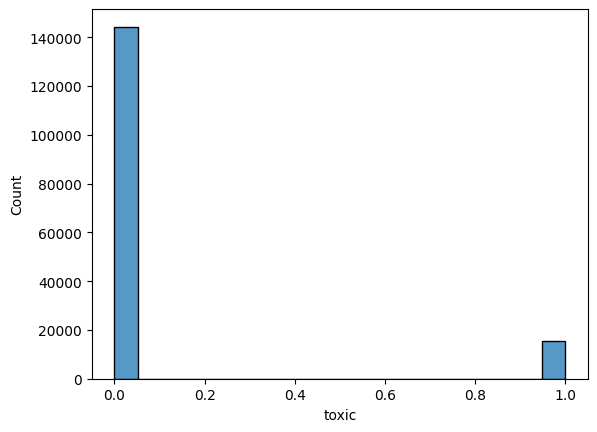

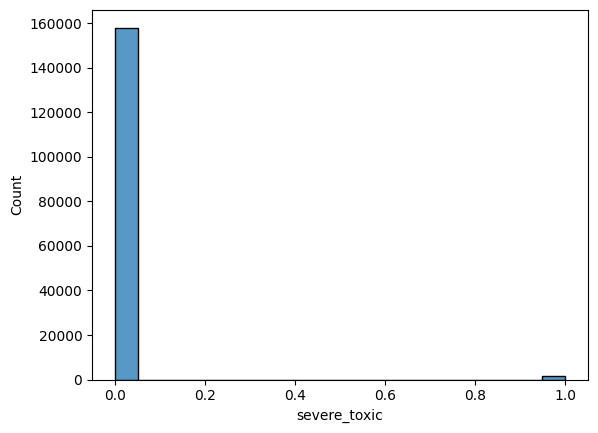

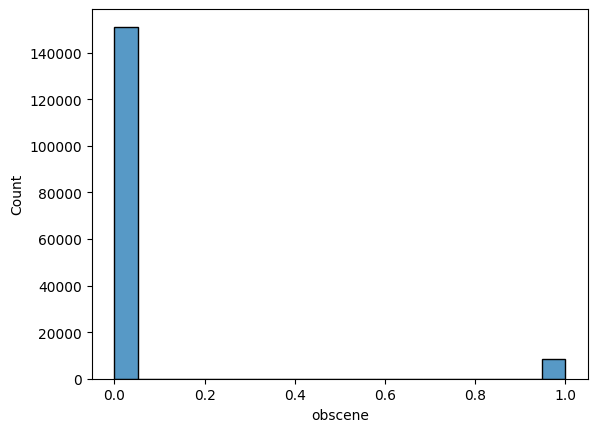

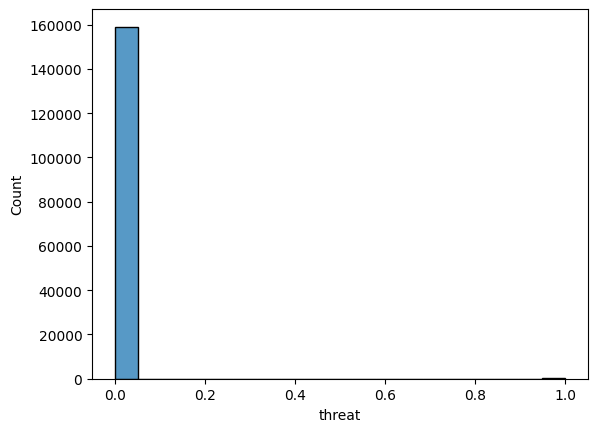

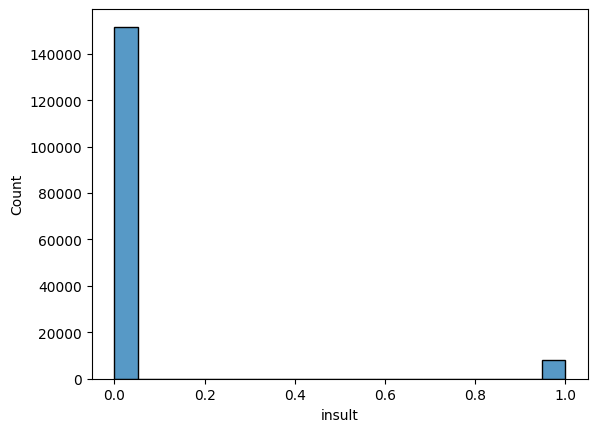

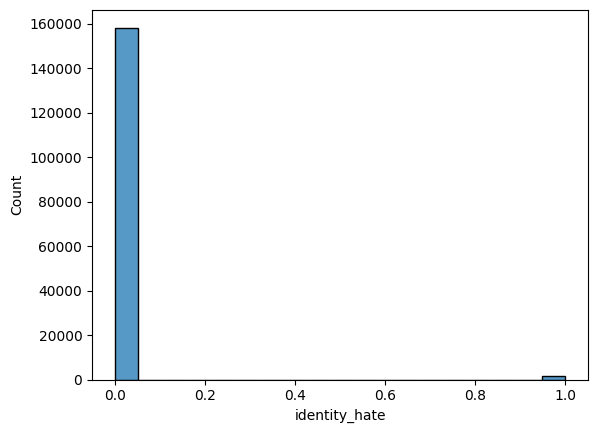

In [19]:
df1 = df_train.drop(['id', 'comment_text'], axis=1)
for i in df1.columns:
    j = 1
    plt.figure(j)
    sns.histplot(data=df1, x=i)
    #plt.savefig('Distribution-of-Classification/Distribution of Classification - ' + i)
    plt.show()
    j = j+1

In [20]:
df2 = df1.sum()
df2

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

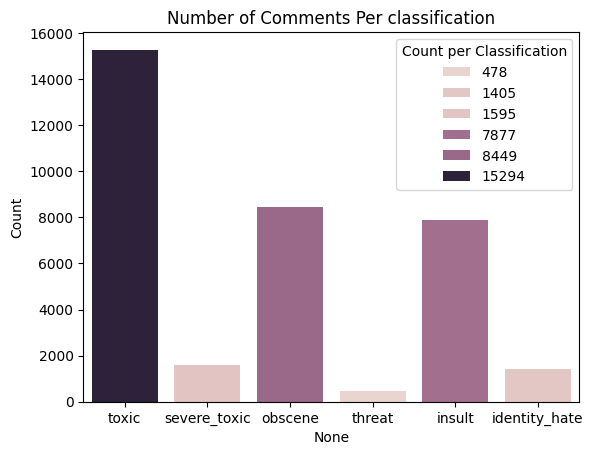

In [21]:
sns.barplot(x=df2.index, y=df2.values, hue=df2.values, dodge=False)
plt.ylabel('Count')
plt.title("Number of Comments Per classification")
leg = plt.legend(title='Count per Classification', bbox_to_anchor=(1,1))
plt.savefig('Number of Comments Per classification', bbox_extra_artists=[leg, ], bbox_inches='tight')

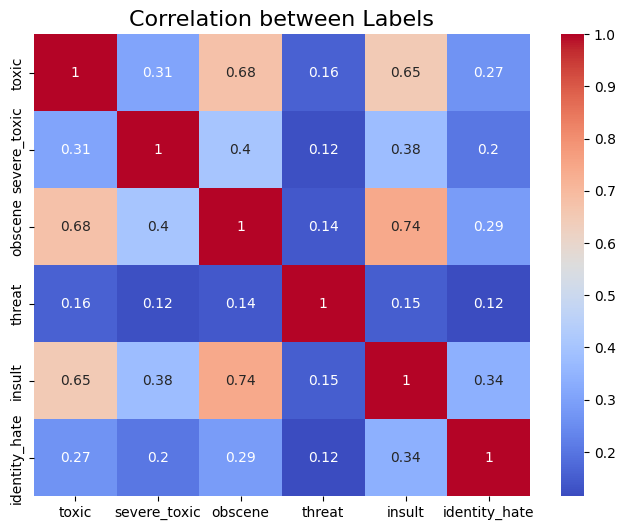

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Labels', fontsize=16)
plt.show()

# Text Pre-Processing

<hr>

## <font color = 'blue'>Cleaning</font>

### Using <b>regular expressions</b>

on Both train and Testing Data

In [23]:
import re
import string

remove_n = lambda x: re.sub("\n", "", x)

remove_alpha_num = lambda x: re.sub("\w*\d\w*", '', x)

remove_pun = lambda x: re.sub(r"([^\w\s]|_)", '', x.lower())

remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

df_train['comment_text'] = df_train['comment_text'].map(remove_n).map(remove_alpha_num).map(remove_pun).map(remove_non_ascii)
df_test['comment_text'] = df_test['comment_text'].map(remove_n).map(remove_alpha_num).map(remove_pun).map(remove_non_ascii)

In [24]:
for i in range(5):
    print(df_train['comment_text'][i])
    print("\n")

explanation edits made username hardcore metallica fan reverted vandalisms closure gas voted new york dolls fac please remove template talk page since im retired now


daww matches background colour im seemingly stuck with thanks talk  january   utc


hey man im really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info


 cant make real suggestions improvement  wondered section statistics later on subsection types accidents i think references may need tidying exact format ie date format etc later on noone else first  preferences formatting style references want please let know appears backlog articles review guess may delay reviewer turns up listed relevant form eg wikipediagoodarticlenominationstransport 


you sir hero chance remember page thats on




In [25]:
for i in range(5):
    print(df_test['comment_text'][i])
    print("\n")

explanation edits made username hardcore metallica fan reverted vandalisms closure gas voted new york dolls fac please remove template talk page since im retired now


daww matches background colour im seemingly stuck with thanks talk  january   utc


hey man im really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info


 cant make real suggestions improvement  wondered section statistics later on subsection types accidents i think references may need tidying exact format ie date format etc later on noone else first  preferences formatting style references want please let know appears backlog articles review guess may delay reviewer turns up listed relevant form eg wikipediagoodarticlenominationstransport 


you sir hero chance remember page thats on




<hr>

## Making Different Datasets of each category

#### to balance the imbalance classes and analysing the most frequent words in those classes with the help of wordcharts

- id, comment_text, toxic
- id, comment_text, severe_toxic
- id, comment_text, obscene
- id, comment_text, threat
- id, comment_text, insult
- id, comment_text, identity_hate

In [26]:
df_toxic = df_train[['id', 'comment_text', 'toxic']]
df_severe_toxic = df_train[['id', 'comment_text', 'severe_toxic']]
df_obscene = df_train[['id', 'comment_text', 'obscene']]
df_threat = df_train[['id', 'comment_text', 'threat']]
df_insult = df_train[['id', 'comment_text', 'insult']]
df_identity_hate = df_train[['id', 'comment_text', 'identity_hate']]

### Making toxic category balance
15294 = toxic [ from graph ]
15294 = non-toxic [ to balance out ]

In [27]:
df_toxic_1 = df_toxic[df_toxic['toxic'] == 1]
df_toxic_0 = df_toxic[df_toxic['toxic'] == 0].iloc[:15294]
df_toxic_bal = pd.concat([df_toxic_1, df_toxic_0], axis=0)
df_toxic_bal.shape

(30588, 3)

### Making severe_toxic category balance
1595 = severe toxic [ from graph ]
1595 = non severe toxic [ to balance out ]

In [28]:
df_severe_toxic_1 = df_severe_toxic[df_severe_toxic['severe_toxic'] == 1]
df_severe_toxic_0 = df_severe_toxic[df_severe_toxic['severe_toxic'] == 0].iloc[:1595]
df_severe_toxic_bal = pd.concat([df_severe_toxic_1, df_severe_toxic_0], axis=0)
df_severe_toxic_bal.shape

(3190, 3)

### Making obscene category balance
8449 = obscene [ from graph ]
8449 = non obscene [ to balance out ]

In [29]:
df_obscene_1 = df_obscene[df_obscene['obscene'] == 1]
df_obscene_0 = df_obscene[df_obscene['obscene'] == 0].iloc[:8449]
df_obscene_bal = pd.concat([df_obscene_1, df_obscene_0], axis=0)
df_obscene_bal.shape

(16898, 3)

### Making threat category balance
478 = threat [ from graph ]
478 = non threat [ to balance out ]|

In [30]:
df_threat_1 = df_threat[df_threat['threat'] == 1]
df_threat_0 = df_threat[df_threat['threat'] == 0].iloc[:700]
df_threat_bal = pd.concat([df_threat_1, df_threat_0], axis=0)
df_threat_bal.shape

(1178, 3)

### Making insult category balance
7877 = insult [ from graph ]
7877 = non insult [ to balance out ]

In [31]:
df_insult_1 = df_insult[df_insult['insult'] == 1]
df_insult_0 = df_insult[df_insult['insult'] == 0].iloc[:7877]
df_insult_bal = pd.concat([df_insult_1, df_insult_0], axis=0)
df_insult_bal.shape

(15754, 3)

### Making identity_hate category balance
1405 = identity hate [ from graph ]
1405 = non identity hate [ to balance out ]

In [32]:
df_identity_hate_1 = df_identity_hate[df_identity_hate['identity_hate'] == 1]
df_identity_hate_0 = df_identity_hate[df_identity_hate['identity_hate'] == 0].iloc[:1405]
df_identity_hate_bal = pd.concat([df_identity_hate_1, df_identity_hate_0], axis=0)
df_identity_hate_bal.shape

(2810, 3)

## Analysing most frequent words using wordcharts

In [33]:
def frequent_words(dataset, category):
    stopwords = STOPWORDS
    wc = WordCloud(width = 600, height = 600, random_state=42, background_color='black', colormap='rainbow', collocations=False, stopwords = stopwords)
    filter = dataset[dataset[category] == 1]
    text = filter.comment_text.values
    wc.generate(' '.join(text))
    #wc.to_file(f"Frequent words in balanced classes/Frequent words in {category} category.png")

In [34]:
frequent_words(df_toxic_bal, 'toxic')
frequent_words(df_severe_toxic_bal, 'severe_toxic')
frequent_words(df_obscene_bal, 'obscene')
frequent_words(df_threat_bal, 'threat')
frequent_words(df_insult_bal, 'insult')
frequent_words(df_identity_hate_bal, 'identity_hate')

In [35]:
df_toxic_bal.to_csv("Toxic.csv")

In [36]:
df_severe_toxic_bal.to_csv('Severe_toxic.csv')
df_obscene_bal.to_csv('Obscene.csv')
df_threat_bal.to_csv('Threat.csv')
df_insult_bal.to_csv('Insult.csv')
df_identity_hate_bal.to_csv('Identity_hate.csv')

#Vectorization and Model #

**Using TF-IDF and Unigram Approach**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [38]:
pip install lazypredict

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [40]:
def vector_model(df, category, vectorizer, ngram):
    X = df['comment_text'].fillna(' ')
    Y = df[category]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    vector = vectorizer(ngram_range=(ngram), stop_words='english')

    X_train_scal = vector.fit_transform(X_train)
    X_test_scal = vector.transform(X_test)


    #logistic regression
    lr = LogisticRegression()
    lr.fit(X_train_scal, Y_train)
    Y_pred_lr = lr.predict(X_test_scal)
    print(f"\nLr done -> It's classification report for {category} category \n {classification_report(Y_test, Y_pred_lr)} ")
    print("\n----------------------------------------------------------------------\n")

    #Support Vector Machine
    svm = SVC(kernel='rbf')
    svm.fit(X_train_scal, Y_train)
    Y_pred_svm = svm.predict(X_test_scal)
    print(f"\nsvm done -> It's classification report for {category} category \n {classification_report(Y_test, Y_pred_svm)} ")
    print("\n----------------------------------------------------------------------\n")

    #Decision Tree Classifier
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=2, random_state=42)
    dt.fit(X_train_scal, Y_train)
    Y_pred_dt = dt.predict(X_test_scal)
    print(f"\nDT done -> It's classification report for {category} category \n {classification_report(Y_test, Y_pred_dt)} ")
    print("\n----------------------------------------------------------------------\n")

    #Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=105, min_samples_split=2, random_state=42)
    rf.fit(X_train_scal, Y_train)
    Y_pred_rf = rf.predict(X_test_scal)
    print(f"\nRF done -> It's classification report for {category} category \n {classification_report(Y_test, Y_pred_rf)} ")
    print("\n----------------------------------------------------------------------\n")

    f1_scores = [round(f1_score(Y_pred_lr, Y_test), 2), round(f1_score(Y_pred_svm, Y_test), 2),
             round(f1_score(Y_pred_dt, Y_test), 2),
             round(f1_score(Y_pred_rf, Y_test), 2)]

    print(f"F1_scores for {category} category Are calculated")

    Scores = {f'F1_Score - {category}':f1_scores}
    Scores_df = pd.DataFrame(Scores, index=[ 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest'])
    return Scores_df

**Toxic**

In [ ]:
# Toxic
df_toxic = pd.read_csv('Toxic.csv')
result_toxic = vector_model(df_toxic, 'toxic', TfidfVectorizer, (1,1))
result_toxic


Lr done -> It's classification report for toxic category 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      4535
           1       0.92      0.85      0.89      4642

    accuracy                           0.89      9177
   macro avg       0.89      0.89      0.89      9177
weighted avg       0.89      0.89      0.89      9177
 

----------------------------------------------------------------------



**Severe_toxic**

In [ ]:
#severe_toxic
df_severe_toxic = pd.read_csv('Severe_toxic.csv')
result_severe_toxic = vector_model(df_severe_toxic, 'severe_toxic', TfidfVectorizer, (1,1))
result_severe_toxic

#Threat

In [ ]:
#Threat
df_threat = pd.read_csv('Threat.csv')
result_threat = vector_model(df_threat, 'threat', TfidfVectorizer, (1,1))
result_threat

**Obscene**

In [ ]:
#Obscene
df_obscene = pd.read_csv('Obscene.csv')
result_obscene = vector_model(df_obscene, 'obscene', TfidfVectorizer, (1,1))
result_obscene

#Insult

In [ ]:
#Insult
df_insult = pd.read_csv('Insult.csv')
result_insult = vector_model(df_insult, 'insult', TfidfVectorizer, (1,1))
result_insult

**Identity_hate**

In [ ]:
# Identity_hate
df_identity_hate = pd.read_csv('Identity_hate.csv')
result_identity_hate = vector_model(df_identity_hate, 'identity_hate', TfidfVectorizer, (1,1))
result_identity_hate

**Visualization of F1-Score of all Categories**

In [ ]:
# Visualization of F1-Score of all categories
result = pd.concat([result_toxic, result_severe_toxic, result_threat, result_obscene, result_insult, result_identity_hate], axis=1)
result = result.transpose()
result.head()

In [ ]:
plt.figure(figsize=(15,15))
sns.lineplot(data=result, markers=True)
plt.legend(loc='best')

**Trying Test Results - picking logistic regression model from above graph**

- <b>Can it Differentiate between <font color = 'red'>Toxic</font> and non-toxic comments</b>

In [ ]:
x = df_toxic.comment_text.fillna(' ')
y = df_toxic['toxic']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
tfv1 = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_scal = tfv1.fit_transform(x_train)
x_test_scal = tfv1.transform(x_test)
lrt = LogisticRegression()
lrt.fit(x_train_scal, y_train)
lrt.predict(x_test_scal)[:100]

- <b>Can it Differentiate between <font color = 'red'>Severe Toxic</font> and non-severe-toxic comments</b>

In [ ]:
x = df_severe_toxic.comment_text.fillna(' ')
y = df_severe_toxic['severe_toxic']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
tfv2 = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_scal = tfv2.fit_transform(x_train)
x_test_scal = tfv2.transform(x_test)
lrst = LogisticRegression()
lrst.fit(x_train_scal, y_train)
lrst.predict(x_test_scal)[:100]

- <b>Can it Differentiate between <font color = 'red'>Threat</font> and non-threat comments</b>

In [ ]:
x = df_threat.comment_text.fillna(' ')
y = df_threat['threat']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
tfv3 = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_scal = tfv3.fit_transform(x_train)
x_test_scal = tfv3.transform(x_test)
lrth = LogisticRegression()
lrth.fit(x_train_scal, y_train)
lrth.predict(x_test_scal)[:100]

- <b>Can it Differentiate between <font color = 'red'>obscene</font> and non-obscene comments</b>

In [ ]:
x = df_obscene.comment_text.fillna(' ')
y = df_obscene['obscene']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
tfv4 = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_scal = tfv4.fit_transform(x_train)
x_test_scal = tfv4.transform(x_test)
lro = LogisticRegression()
lro.fit(x_train_scal, y_train)
lro.predict(x_test_scal)[:100]

- <b>Can it Differentiate between <font color = 'red'>Insult</font> and non-Insult comments</b>

In [ ]:
x = df_insult.comment_text.fillna(' ')
y = df_insult['insult']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
tfv5 = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_scal = tfv5.fit_transform(x_train)
x_test_scal = tfv5.transform(x_test)
lri = LogisticRegression()
lri.fit(x_train_scal, y_train)
lri.predict(x_test_scal)[:100]

- <b> Can it Differentiate between <font color = 'red'>identity_hate</font> and non-Identity_hate comments</b>

In [ ]:
x = df_identity_hate.comment_text.fillna(' ')
y = df_identity_hate['identity_hate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
tfv6 = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_scal = tfv6.fit_transform(x_train)
x_test_scal = tfv6.transform(x_test)
lrid = LogisticRegression()
lrid.fit(x_train_scal, y_train)
lrid.predict(x_test_scal)[:100]

In [ ]:
example1 = ['7th person on the edge of the cliff is a fucked up person']
example2 = ['if you have a look back at the source the information i updated was the correct form i can only guess the source hadnt updated i shall update the information once again but thank you for your message']

In [ ]:
def getfiles(df, label):
    x = df.comment_text.fillna(' ')
    y = df[label]

    tfv_f = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
    X_vect = tfv_f.fit_transform(x)

    with open(f'{label + "_vect"}.pkl', 'wb') as f:
        pickle.dump(tfv_f, f)

    log = LogisticRegression()
    log.fit(X_vect, y)

    with open(f'{label + "_model"}.pkl', 'wb') as f:
        pickle.dump(log, f)


In [ ]:
list_c = ['toxic', 'severe_toxic', 'threat', 'obscene', 'insult', 'identity_hate']
list_d = [df_toxic, df_severe_toxic, df_threat, df_obscene, df_insult, df_identity_hate]
for i, j in zip(list_d, list_c):
    getfiles(i, j)

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load models and vectorizers
with open('toxic_vect.pkl', 'rb') as f:
    toxic_vect = pickle.load(f)
with open('toxic_model.pkl', 'rb') as f:
    toxic_model = pickle.load(f)
with open('severe_toxic_vect.pkl', 'rb') as f:
    severe_toxic_vect = pickle.load(f)
with open('severe_toxic_model.pkl', 'rb') as f:
    severe_toxic_model = pickle.load(f)
with open('threat_vect.pkl', 'rb') as f:
    threat_vect = pickle.load(f)
with open('threat_model.pkl', 'rb') as f:
    threat_model = pickle.load(f)
with open('obscene_vect.pkl', 'rb') as f:
    obscene_vect = pickle.load(f)
with open('obscene_model.pkl', 'rb') as f:
    obscene_model = pickle.load(f)
with open('insult_vect.pkl', 'rb') as f:
    insult_vect = pickle.load(f)
with open('insult_model.pkl', 'rb') as f:
    insult_model = pickle.load(f)
with open('identity_hate_vect.pkl', 'rb') as f:
    identity_hate_vect = pickle.load(f)
with open('identity_hate_model.pkl', 'rb') as f:
    identity_hate_model = pickle.load(f)

In [ ]:
def predict(comment):
    # Predictions
    result = {}

    # Toxic
    toxic_vect_text = toxic_vect.transform([comment])
    toxic_prob = round(toxic_model.predict_proba(toxic_vect_text)[:, 1][0], 2)
    result['Toxic'] = f"{toxic_prob} {'True' if toxic_prob >= 0.65 else ('Mid' if 0.35 <= toxic_prob < 0.65 else 'False')}"

    # Severe toxic
    severe_toxic_vect_text = severe_toxic_vect.transform([comment])
    severe_toxic_prob = round(severe_toxic_model.predict_proba(severe_toxic_vect_text)[:, 1][0], 2)
    result['Severe Toxic'] = f"{severe_toxic_prob} {'True' if severe_toxic_prob >= 0.65 else ('Mid' if 0.35 <= severe_toxic_prob < 0.65 else 'False')}"

    # Threat
    threat_vect_text = threat_vect.transform([comment])
    threat_prob = round(threat_model.predict_proba(threat_vect_text)[:, 1][0], 2)
    result['Threat'] = f"{threat_prob} {'True' if threat_prob >= 0.65 else ('Mid' if 0.35 <= threat_prob < 0.65 else 'False')}"

    # Obscene
    obscene_vect_text = obscene_vect.transform([comment])
    obscene_prob = round(obscene_model.predict_proba(obscene_vect_text)[:, 1][0], 2)
    result['Obscene'] = f"{obscene_prob} {'True' if obscene_prob >= 0.65 else ('Mid' if 0.35 <= obscene_prob < 0.65 else 'False')}"

    # Insult
    insult_vect_text = insult_vect.transform([comment])
    insult_prob = round(insult_model.predict_proba(insult_vect_text)[:, 1][0], 2)
    result['Insult'] = f"{insult_prob} {'True' if insult_prob >= 0.65 else ('Mid' if 0.35 <= insult_prob < 0.65 else 'False')}"

    # Identity hate
    identity_hate_vect_text = identity_hate_vect.transform([comment])
    identity_hate_prob = round(identity_hate_model.predict_proba(identity_hate_vect_text)[:, 1][0], 2)
    result['Identity Hate'] = f"{identity_hate_prob} {'True' if identity_hate_prob >= 0.65 else ('Mid' if 0.35 <= identity_hate_prob < 0.65 else 'False')}"

    # Calculate the counts of True, False, and Mid for each category
    counts = {'True': 0, 'False': 0, 'Mid': 0}

    # Update counts for each category
    for key, value in result.items():
        if value.endswith('True'):
            counts['True'] += 1
        elif value.endswith('False'):
            counts['False'] += 1
        elif value.endswith('Mid'):
            counts['Mid'] += 1

    # Determine the final conclusion based on the counts
    if counts['True'] == 6:
        final_conclusion = 'Chắc chắn độc hại'
    elif counts['True'] >= 1 and counts['True'] <= 2 and counts['False'] > 0:
        final_conclusion = 'Có khả năng độc hại'
    elif counts['True'] >= 1 and counts['True'] <= 2 and counts['False'] == 0:
        final_conclusion = 'Có khả năng độc hại'
    elif counts['False'] == 6:
        final_conclusion = 'Không độc hại'
    elif counts['Mid'] == 6:
        final_conclusion = 'Có khả năng độc hại ở mức trung bình'
    elif counts['True'] == 0 and counts['Mid'] > counts['False']:
        final_conclusion = 'Có khả năng độc hại ở mức trung bình'
    elif counts['True'] == 0 and counts['Mid'] > counts['False']:
        final_conclusion = 'Có khả năng độc hại'
    elif counts['True'] == 0 and counts['False'] > counts['Mid']:
        final_conclusion = 'Không độc hại'
    else:
        final_conclusion = 'Có khả năng độc hại nhưng thấp'

    # Add final conclusion to the result dictionary
    result['Final Conclusion'] = final_conclusion

    return result

# Sample comment for testing
sample_comment = "This is a sample comment."

# Call the predict function with the sample comment
result = predict(sample_comment)
print(result)


In [ ]:
# Sample comment for testing
sample_comment = "a fucking caton the bed."
result = predict(sample_comment)
result

In [ ]:
result = predict(example1)
result

In [ ]:
result = predict(example2)
result